### Нарушение допущения о независимости наблюдений
#### Зависимости, которые мы встречаем в исследованиях:
* Повторение измерения
    * на разных уровнях независимой переменной
* Повторные пробы
    * на одном и том же уровне независимой переменной
* Кластеризация данных
    * нет повторных измерений, но данные взяты из нескольких гомогенных групп
#### Проблемы, которые могут породить эти зависимости
* Повторные измерения
    * Искусственное увеличение мощности теста - псевдорепликация (использование одних и тех же объектов исследования)
    * Снижение чувствительности теста
* Несбалансированное разбиение данных (больше проблема класстеризации) 
    * Искажение результатов
* Кластеризация данных
    * Искажение результатов

## Смешанные регрессионные модели
##### Эффект - влияние независимой переменной, с помощью которой мы предсказываем зависимую переменную. 
* Фиксированный эффект - влияние независимой переменной, представляющее основной интерес (независимые переменные - то что мы хотим варьировать)
* Случайный эффект (пол, возраст, стимул, город, испытуемый - то, что мы не хотим варьировать, но это необходимо)
##### Рассмотрим примеры исследований.
1. Исследователи решили проверить, есть ли взаимосвязь между первым предметом, который видит ребенок после рождения, и первым словом, которое он произносит. В ряде клиник врачи показывали детям разные объекты и фиксировали этот факт. Через некоторое время авторы исследования собрали данные о том, какие слова были первыми у этих дет.<br>
Случайные эффекты в данном исследовании: клиника, в которой родился ребенок; врач, который показывал ребёнку объект. 
2. Врачи нескольких клиник решили сравнить две диеты: средиземноморскую и скандинавскую — по их влиянию на продолжительность сна. Исследователи наблюдали две группы людей, которые питались по-разному (средиземноморская или скандинавская диета), и фиксировали продолжительность сна и общее самочувствие испытуемых. <br>
Случайные эффекты в данном исследовании: место проживания испытуемого, клиника,
пол врача,пол испытуемого.т 


#### Регрессионная модель со смешанным эффектом

In [186]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# грузим датасет
url = 'https://raw.githubusercontent.com/razority/R_data/main/Exam.xlsx'
exam = pd.read_excel(url)
exam['school'] = exam['school'].astype(str)
exam.head()

,school,normexam,schgend,schavg,vr,intake,standLRT,sex,type,student
0,1,0.261324,mixed,0.166175,mid 50%,bottom 25%,0.619059,F,Mxd,143
1,1,0.134067,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd,145
2,1,-1.723882,mixed,0.166175,mid 50%,top 25%,-1.364576,M,Mxd,142
3,1,0.967586,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd,141
4,1,0.544341,mixed,0.166175,mid 50%,mid 50%,0.371105,F,Mxd,138


In [187]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# грузим датасет
url = 'https://raw.githubusercontent.com/razority/R_data/main/Exam.xlsx'
exam = pd.read_excel(url)
exam['school'] = exam['school'].astype(str)
# exam.head()

# исследуем модель
model = smf.ols('normexam ~ standLRT', data=exam).fit()
display(model.summary())
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               normexam   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     2185.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        21:00:25   Log-Likelihood:                -4880.3
No. Observations:                4059   AIC:                             9765.
Df Residuals:                    4057   BIC:                             9777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0012      0.013     -0.094      0.925      -0.026       0.024
standLRT       0.5951      0.013     46.744      0.000       0.570       0.620
==============================================================================
Omnibus:                        2.846   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.856
Skew:                          -0.039   Prob(JB):                        0.240
Kurtosis:                       3.104   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Мы видим, что standLRT статестически значим для нашей модели. 
(вторая таблица это Фиксированный эффек) 

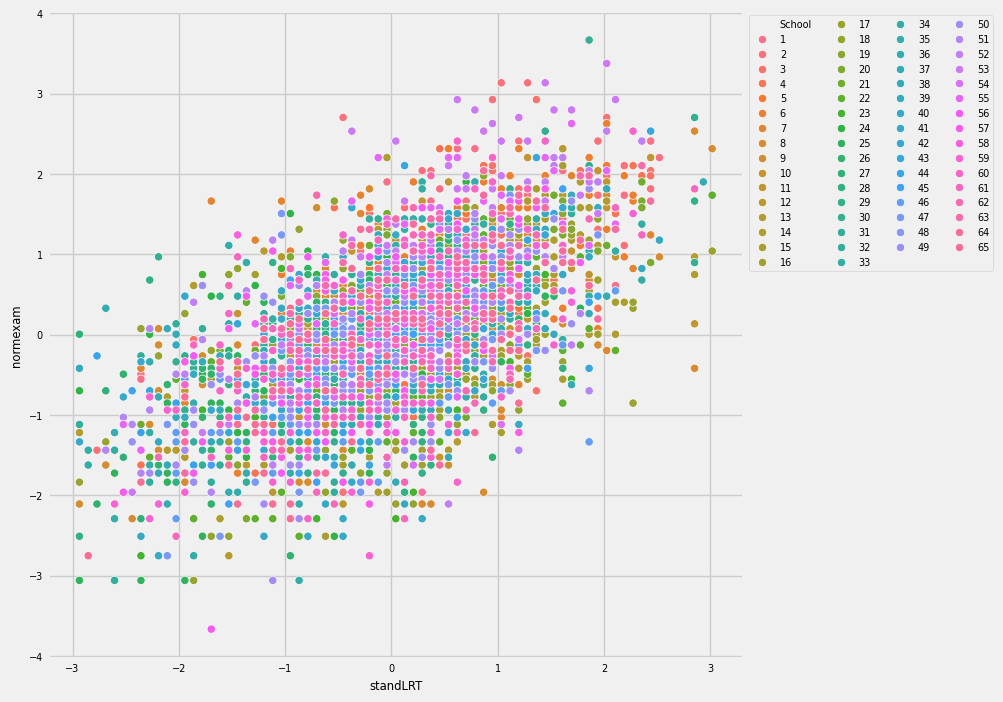

In [170]:
# рисуем диаграмму рассеяния 
fig, ax = plt.subplots(figsize=(8,8))
g = sns.scatterplot(x='standLRT', y='normexam', hue='school', data=exam)
# подредактируем легенду
h,l = g.get_legend_handles_labels()
ph = [plt.plot([],marker="", ls="")[0]]
handles = ph + h
labels = ["School"] + l
g.legend(handles,labels, ncol=4, bbox_to_anchor=(1, 1), loc = 2)

#### Линейная регрессия

Text(0.5, 1.0, 'Linear regression')

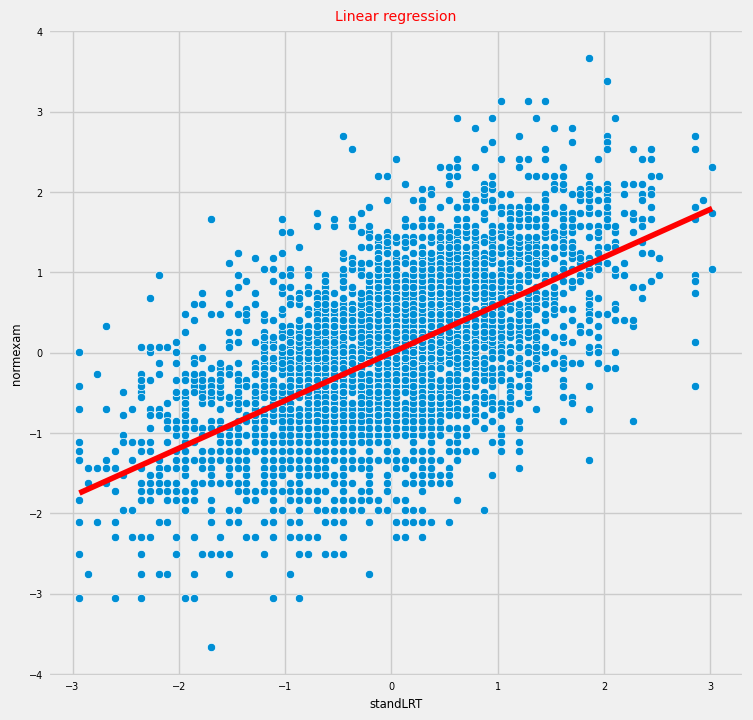

In [166]:
plt.rc('font', size= 7 ) 
plt.subplots(figsize=(8,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam)
sns.lineplot(x = x, y = b0 + b1*x, color='red')
plt.title("Linear regression", color='red') 

#### Регрессионные модели, если их строить отдельно для каждой школы

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: normexam  
No. Observations: 4059    Method:             REML      
No. Groups:       65      Scale:              0.5659    
Min. group size:  2       Log-Likelihood:     -4684.3826
Max. group size:  198     Converged:          Yes       
Mean group size:  62.4                                  
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  0.002     0.040   0.058  0.954  -0.077   0.081
standLRT   0.563     0.012  45.106  0.000   0.539   0.588
Group Var  0.094     0.025                               
========================================================

"""

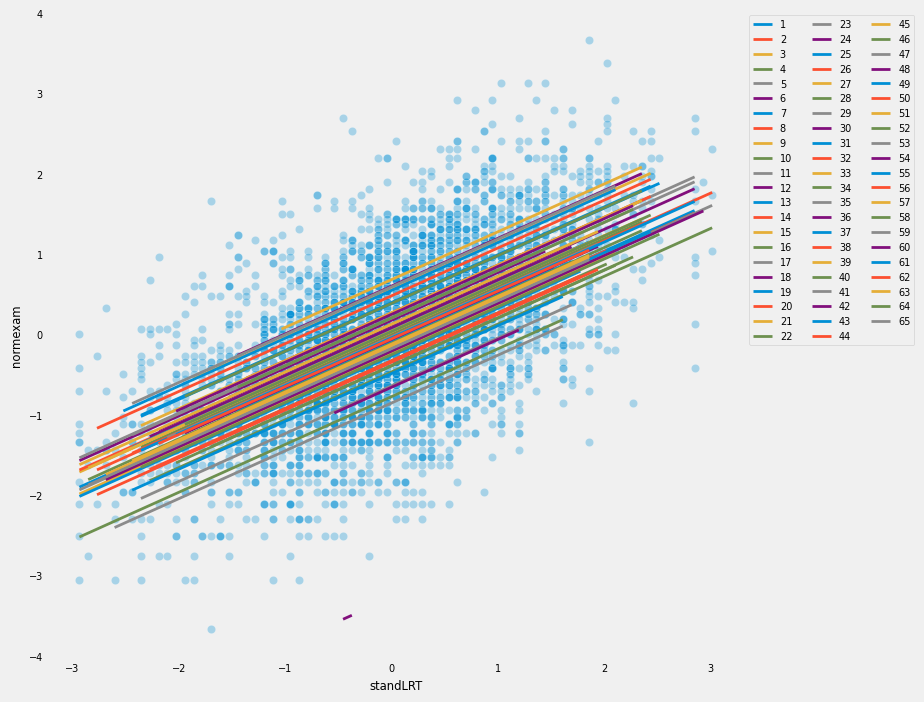

In [184]:
# Главный эффект + случайный угловой коэффициент 
# normexam ~ standLRT + (1|school)
model2 = smf.mixedlm('normexam ~ standLRT', data=exam, groups=exam['school']).fit()
display(model2.summary())

# задаём только intercept для каждой школы
plt.figure(figsize=(8,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)
for school in exam['school'].unique():
    X2 = np.array(exam[exam['school'] == school].loc[:,'standLRT'])
    y2 = np.array(exam[exam['school'] == school].loc[:,'normexam'])
    b01, b00 = np.polyfit(X2, y2, 1) 
    sns.lineplot(x = X2,y = b00 + b1*X2, legend = 'full', label = school, linewidth= 2)
    
plt.legend(ncol=3, bbox_to_anchor=(1., 1.))
plt.grid()

Посмотрим взаимосвязь между вступительными экзаменами в разных школах.
И по полученным даннам построим регрессионные прямые 

<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:               MixedLM   Dependent Variable:   normexam  
No. Observations:    4059      Method:               REML      
No. Groups:          65        Scale:                0.5536    
Min. group size:     2         Log-Likelihood:       -4663.8002
Max. group size:     198       Converged:            Yes       
Mean group size:     62.4                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            -0.012    0.040 -0.290 0.772 -0.090  0.067
standLRT              0.557    0.020 27.588 0.000  0.517  0.596
Group Var             0.092    0.025                           
Group x standLRT Cov  0.018    0.010                           
standLRT Var          0.015    0.006                           
===============================================================

"""

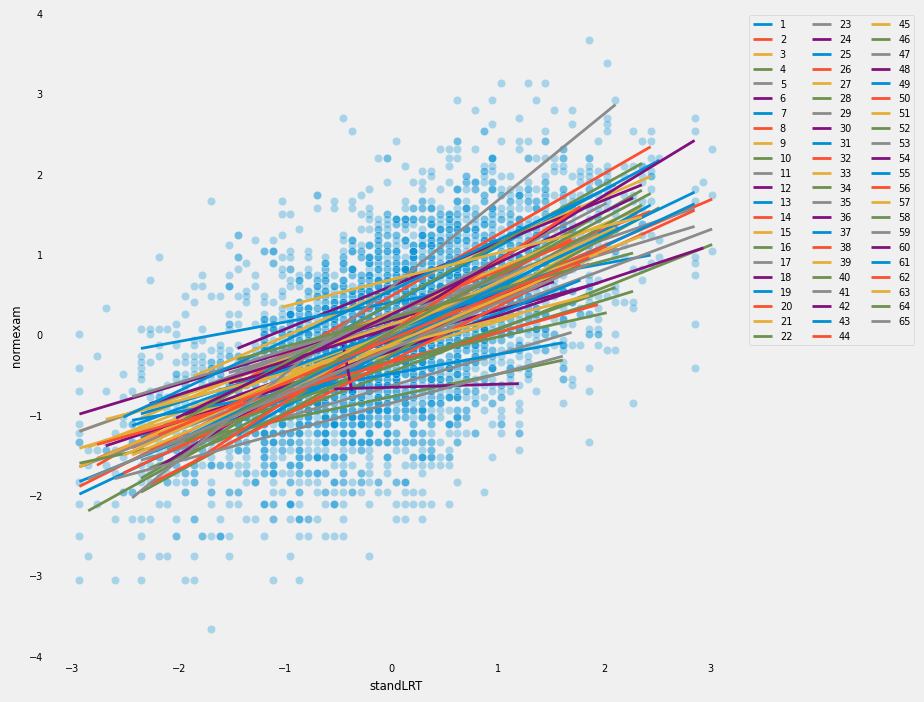

In [185]:
# Главный эффект + случайный свободный член + случайный угловой коэффициент 
# normexam ~ standLRT + (1 + standLRT|school) 
model3 = smf.mixedlm('normexam ~ standLRT', data=exam, groups=exam['school'], re_formula="~standLRT").fit()
display(model3.summary())

plt.figure(figsize=(8,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)

# задаём только slope и intercept для каждой школы
for school in exam['school'].unique():
    X2 = np.array(exam[exam['school'] == school].loc[:,'standLRT'])
    y2 = np.array(exam[exam['school'] == school].loc[:,'normexam'])
    b01, b00 = np.polyfit(X2, y2, 1) #  b00 - intercept for school , b01 - slope for school
    sns.lineplot(x = X2, y = b00 + b01*X2, legend = 'full', label = school, linewidth= 2)
    
plt.legend(ncol=3, bbox_to_anchor=(1., 1.))
plt.grid()  

Теперь регрессионные прямые для каждой школы не только отличаются свободным членом, но так же и углом наклона. Фактически мы сделали для каждой школы свою регрессионную модель, соответственно  и предсказания для каждой школы отдельны. 